# Assignment 3 - Loan Prediction

In [82]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
# Import preprocessing modules
from sklearn.impute import SimpleImputer
from sksurv.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [169]:
# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor

In [438]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## 1. Import & Clean/Prep Data

In [339]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')

C:\Users\willm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [340]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [341]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32'],
      dtype='object')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

### Drop irrelevant columns

In [343]:
# drop columns 2, 3 ,10, 16, 18, 20 due to high amount of unique values, 15 & 23 - dates
df_clean = df[['X1', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X11',
       'X12', 'X13', 'X14', 'X17', 'X19', 'X21',
       'X22', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32']]

### Drop Completely Null row

In [344]:
df_clean.isnull().sum()

X1      61010
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X11     17538
X12     61361
X13     61028
X14         1
X17         1
X19         1
X21         1
X22         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [345]:
df_clean[df_clean.iloc[:,1].isnull()]

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X22,X24,X25,X26,X27,X28,X29,X30,X31,X32
364111,7.69%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
# drop completely null record
df_clean.drop(df_clean[df_clean.iloc[:,1].isnull()].index, inplace = True)
df_clean[df_clean.iloc[:,1].isnull()]

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X22,X24,X25,X26,X27,X28,X29,X30,X31,X32


### convert relevant columns to numerical

In [347]:
df_clean.loc[:,'X1'] = pd.to_numeric(df_clean.loc[:,'X1'].replace('%','', regex = True))

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [348]:
dollar_cols = ['X4','X5','X6']
for col in dollar_cols:
    df_clean.loc[:,col] = df_clean.loc[:,col].str.replace('$','', regex = True).str.replace(',','', regex = True).astype(int)

In [349]:
df_clean.loc[:,'X7'] = df_clean.loc[:,'X7'].str.replace(' months','', regex = True).astype(int)

##### Convert X11 to numerical

In [319]:
df_clean.X11.unique()

array(['< 1 year', '1 year', '10+ years', '6 years', '9 years', '3 years',
       '5 years', '2 years', '4 years', '8 years', '7 years', nan],
      dtype=object)

In [350]:
x11_dict = {'< 1 year': '0',  '1 year': '1', '10+ years': '10', '6 years': '6',  '9 years': '9',  '3 years': '3', '5 years': '5',  '2 years': '2',  '4 years': '4',  '8 years': '8', '7 years': '7'}
df_clean['X11'].replace(x11_dict, inplace=True)
df_clean['X11'].unique()

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\series.py:4512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array(['0', '1', '10', '6', '9', '3', '5', '2', '4', '8', '7', nan],
      dtype=object)

In [351]:
df_clean.loc[:,'X11'] = pd.to_numeric(df_clean.loc[:,'X11'])

In [352]:
df_clean.loc[:,'X19'] = df_clean.loc[:,'X19'].str.replace('xx','', regex = True).astype(int)

In [353]:
df_clean.loc[:,'X30'] = pd.to_numeric(df_clean.loc[:,'X30'].replace('%','', regex = True))

In [324]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = df_clean.select_dtypes(include=numerics).columns

In [325]:
df_clean[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399999 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338989 non-null  float64
 1   X4      399999 non-null  int32  
 2   X5      399999 non-null  int32  
 3   X6      399999 non-null  int32  
 4   X7      399999 non-null  int32  
 5   X11     382462 non-null  float64
 6   X13     338972 non-null  float64
 7   X19     399999 non-null  int32  
 8   X21     399999 non-null  float64
 9   X22     399999 non-null  float64
 10  X24     399999 non-null  float64
 11  X25     181198 non-null  float64
 12  X26     51155 non-null   float64
 13  X27     399999 non-null  float64
 14  X28     399999 non-null  float64
 15  X29     399999 non-null  float64
 16  X30     399733 non-null  float64
 17  X31     399999 non-null  float64
dtypes: float64(13), int32(5)
memory usage: 50.4 MB


In [326]:
df_clean.loc[:,numeric_cols].head()

,X1,X4,X5,X6,X7,X11,X13,X19,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
0,11.89,25000,25000,19080,36,0.0,85000.0,941,19.48,0.0,0.0,NaN,NaN,10.0,0.0,28854.0,52.1,42.0
1,10.71,7000,7000,673,36,0.0,65000.0,112,14.29,0.0,0.0,NaN,NaN,7.0,0.0,33623.0,76.7,7.0
2,16.99,25000,25000,24725,36,1.0,70000.0,100,10.50,0.0,0.0,41.0,NaN,10.0,0.0,19878.0,66.3,17.0
3,13.11,1200,1200,1200,36,10.0,54000.0,777,5.47,0.0,0.0,64.0,NaN,5.0,0.0,2584.0,40.4,31.0
4,13.57,10800,10800,10692,36,6.0,32000.0,67,11.63,0.0,1.0,58.0,NaN,14.0,0.0,3511.0,25.6,40.0


### Create clusters based on non-null numeric columns to impute more specific values

In [263]:
nonnull_numeric_cols = ['X4', 'X5', 'X6', 'X7', 'X19', 'X21','X22', 'X24', 'X27', 'X28', 'X29', 'X31']
df_clustering_data = df_clean.loc[:,nonnull_numeric_cols]

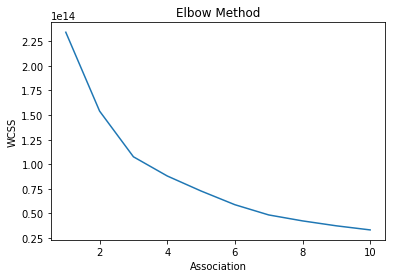

In [266]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(df_clustering_data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [269]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_clustering_data)

In [286]:
print("cluster 0: ",df_clean[y_kmeans == 0].count()[1])
print("cluster 1: ",df_clean[y_kmeans == 1].count()[1])
print("cluster 2: ",df_clean[y_kmeans == 2].count()[1])

cluster 0:  128594
cluster 1:  3417
cluster 2:  267988


### Impute Null values by cluster

In [354]:
missing_val_count_by_column = (df_clean.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column>0]

X1      61010
X8      61269
X9      61269
X11     17537
X12     61360
X13     61027
X25    218801
X26    348844
X30       266
dtype: int64

In [24]:
numerical_null_cols = ['X1','X11', 'X13','X25', 'X26', 'X30']

##### IMPUTE MISSING NUMERICAL VALUES FOR EACH CLUSTER

In [355]:
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean') 
for i in [0,1,2]:
    imputer_num.fit(df_clean.loc[y_kmeans == i,numerical_null_cols])
    df_clean.loc[y_kmeans == i,numerical_null_cols]  = imputer_num.transform(df_clean.loc[y_kmeans == i,numerical_null_cols])

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [356]:
# check missing values again
missing_val_count_by_column = (df_clean.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column>0]

X8     61269
X9     61269
X12    61360
dtype: int64

#### String Null Cols ['X8', 'X9', 'X12']

In [33]:
string_null_cols = ['X8', 'X9', 'X12']

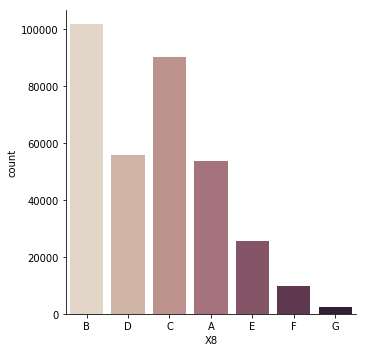

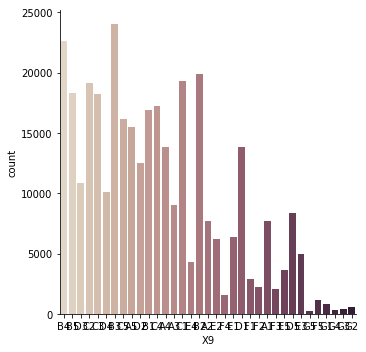

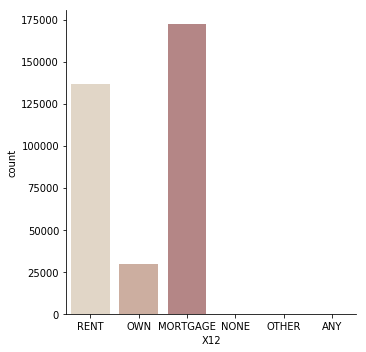

In [34]:
for x in string_null_cols:
    sns.catplot(x=x, kind="count", palette="ch:.25", data=df)

##### IMPUTE DATA STRING COLUMNS

In [357]:
imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
for i in [0,1,2]:
    imputer_str.fit(df_clean.loc[y_kmeans == i,string_null_cols])
    df_clean.loc[y_kmeans == i,string_null_cols]  = imputer_str.transform(df_clean.loc[y_kmeans == i,string_null_cols])

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [358]:
# check missing values again
missing_val_count_by_column = (df_clean.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column>0]

Series([], dtype: int64)

In [359]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399999 entries, 0 to 399999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      399999 non-null  float64
 1   X4      399999 non-null  int32  
 2   X5      399999 non-null  int32  
 3   X6      399999 non-null  int32  
 4   X7      399999 non-null  int32  
 5   X8      399999 non-null  object 
 6   X9      399999 non-null  object 
 7   X11     399999 non-null  float64
 8   X12     399999 non-null  object 
 9   X13     399999 non-null  float64
 10  X14     399999 non-null  object 
 11  X17     399999 non-null  object 
 12  X19     399999 non-null  int32  
 13  X21     399999 non-null  float64
 14  X22     399999 non-null  float64
 15  X24     399999 non-null  float64
 16  X25     399999 non-null  float64
 17  X26     399999 non-null  float64
 18  X27     399999 non-null  float64
 19  X28     399999 non-null  float64
 20  X29     399999 non-null  float64
 21  X30     39

#### CONVERT STRING COLUMNS TO NUMERIC

In [360]:
string_cols = df_clean.select_dtypes(include='object').columns
df_clean[string_cols].nunique(axis=0) 

X8      7
X9     35
X12     6
X14     3
X17    14
X32     2
dtype: int64

In [361]:
string_cols = ['X8', 'X12', 'X14', 'X17', 'X32']

In [362]:
df_clean_string = OneHotEncoder().fit_transform(df_clean[string_cols].astype("category"))
df_clean_string.head()

,X8=B,X8=C,X8=D,X8=E,X8=F,X8=G,X12=MORTGAGE,X12=NONE,X12=OTHER,X12=OWN,...,X17=house,X17=major_purchase,X17=medical,X17=moving,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create total numeric dataset

In [363]:
a = df_clean[numeric_cols]
a.shape

(399999, 18)

In [364]:
b = df_clean_string
b.shape

(399999, 27)

In [365]:
final_numeric_df = pd.concat([a,b], axis=1).replace(np.nan,0, regex = True)
final_numeric_df.shape

(399999, 45)

In [366]:
final_numeric_df.head()

,X1,X4,X5,X6,X7,X11,X13,X19,X21,X22,...,X17=house,X17=major_purchase,X17=medical,X17=moving,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w
0,11.89,25000,25000,19080,36,0.0,85000.0,941,19.48,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.71,7000,7000,673,36,0.0,65000.0,112,14.29,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.99,25000,25000,24725,36,1.0,70000.0,100,10.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13.11,1200,1200,1200,36,10.0,54000.0,777,5.47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.57,10800,10800,10692,36,6.0,32000.0,67,11.63,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### EDA

In [39]:
round((df_clean.describe().transpose()),2)

,count,mean,std,min,25%,50%,75%,max
X1,399999.0,13.95,4.03,5.42,11.55,13.95,16.02,26.06
X4,399999.0,14274.06,8251.45,500.00,8000.00,12000.00,20000.00,35000.00
X5,399999.0,14245.76,8236.94,500.00,8000.00,12000.00,20000.00,35000.00
X6,399999.0,14182.98,8250.99,0.00,8000.00,12000.00,19900.00,35000.00
X7,399999.0,42.46,10.64,36.00,36.00,36.00,60.00,60.00
X11,399999.0,5.99,3.53,0.00,3.00,6.00,10.00,10.00
X13,399999.0,73160.15,51429.60,3000.00,48634.13,70000.00,82000.00,7500000.00
X19,399999.0,514.80,317.12,7.00,222.00,480.00,827.00,999.00
X21,399999.0,17.00,7.70,0.00,11.25,16.70,22.52,39.99
X22,399999.0,0.27,0.78,0.00,0.00,0.00,0.00,29.00


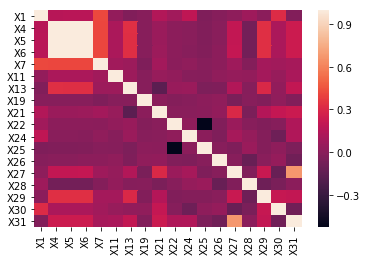

In [41]:
corr = df_clean.corr()
sns.heatmap(corr)

C:\Users\willm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


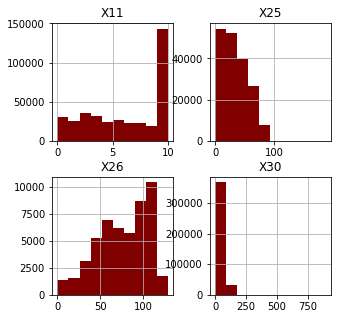

In [25]:
# Plotting numerical null column distributions
fig = plt.figure(figsize = (5, 5))
ax  = fig.gca()
df_clean[['X11','X25', 'X26', 'X30']].hist(ax = ax, color = 'maroon')
pass # Removes the text output

In [26]:
df_clean[df_clean['X13'] > 3500000]['X13']

9770      6000000.0
10233     3900000.0
92301     5000000.0
94549     7141778.0
245459    7446395.0
327344    4560077.0
373003    7500000.0
389929    4900000.0
Name: X13, dtype: float64

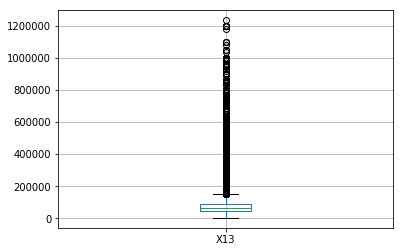

In [27]:
df_clean[df_clean['X13'] < 1250000][['X13']].boxplot()

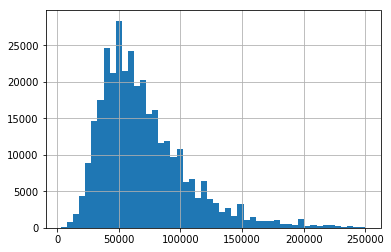

In [29]:
df_clean[df_clean['X13'] < 250000]['X13'].hist(bins=50)

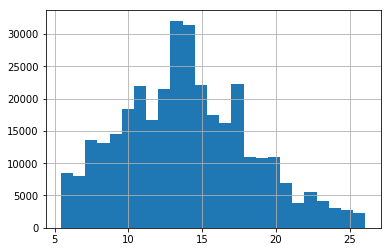

In [30]:
df_clean['X1'].hist(bins=25)

In [28]:
df_clean[df_clean['X13']<3500000]['X13'].mean()

73024.84633261914

## 2. Build & Evaluate Models

In [367]:
Y = final_numeric_df['X1']
X = final_numeric_df.iloc[:,1:]

In [368]:
X.shape

(399999, 44)

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [459]:
Y_train.shape

(319999,)

In [455]:
# Initialize Models
LR_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)
rf_model = RandomForestRegressor(max_depth=8)
GB_model = GradientBoostingRegressor()
XGB_model = xgb.XGBRegressor(objective ='reg:linear',max_depth=4)
VR_model = VotingRegressor([('DT', tree_model),('RF',rf_model),('GB',GB_model),('XGB',XGB_model)])

labels = ['Linear Regression','Decision Tree', 'Random Forest', 'Gradient Boost', 'XG Boost','Voting Regressor']

In [456]:
# Calculate desired Error (CV)
for model, label in zip([LR_model,tree_model,rf_model,GB_model,XGB_model,VR_model], labels):
    model.fit(X_train, Y_train)
    MSE_CV_scores = - cross_val_score(model, X_train, Y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1)
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print(label," CV RMSE = ",RMSE_CV)

Linear Regression  CV RMSE =  2.2694923909210822
Decision Tree  CV RMSE =  2.27892220524607
Random Forest  CV RMSE =  2.2656246335233527
Gradient Boost  CV RMSE =  2.285446050218076
[17:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost  CV RMSE =  2.182991263934251
[17:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Voting Regressor  CV RMSE =  2.2206730295411035


In [460]:
# Evaluate Models on Training & test sets
for model, label in zip([LR_model,tree_model,rf_model,GB_model,XGB_model,VR_model], labels):
    model.fit(X_train, Y_train)
    mse_train = mean_squared_error(Y_train, model.predict(X_train))
    mse_test = mean_squared_error(Y_test, model.predict(X_test))
    print(label," RMSE Train = ", sqrt(mse_train))
    print(label," RMSE Test = ", sqrt(mse_test))

Linear Regression  RMSE Train =  2.2690198536965567
Linear Regression  RMSE Test =  2.279704764645959
Decision Tree  RMSE Train =  2.265794303598951
Decision Tree  RMSE Test =  2.2887732459595584
Random Forest  RMSE Train =  2.253605221995857
Random Forest  RMSE Test =  2.2760016960661815
Gradient Boost  RMSE Train =  2.284437664454401
Gradient Boost  RMSE Test =  2.2915736204336667
[18:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost  RMSE Train =  2.1605405497506105
XG Boost  RMSE Test =  2.1856035482706355
[18:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Voting Regressor  RMSE Train =  2.2079521918494076
Voting Regressor  RMSE Test =  2.2272183220356987


# ***XG BOOST HAS LOWEST RMSE***

##### Individual models to test parameters - final values above

In [210]:
LR_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, LR_model.predict(X_train))
mse_test = mean_squared_error(Y_test, LR_model.predict(X_test))
print("LR RMSE Train = ", sqrt(mse_train))
print("LR RMSE Test = ", sqrt(mse_test))

LR RMSE Train =  2.3054291422489515
LR RMSE Test =  180486812.97926044


In [207]:
tree_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, tree_model.predict(X_train))
mse_test = mean_squared_error(Y_test, tree_model.predict(X_test))
print("DT RMSE Train = ", sqrt(mse_train))
print("DT RMSE Test = ", sqrt(mse_test))

DT RMSE Train =  2.2261156471258556
DT RMSE Test =  2.2636894413266937


In [ ]:
rf_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, rf_model.predict(X_train))
mse_test = mean_squared_error(Y_test, rf_model.predict(X_test))
print("RF RMSE Train = ", sqrt(mse_train))
print("RF RMSE Test = ", sqrt(mse_test))

In [132]:
GB_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, GB_model.predict(X_train))
mse_test = mean_squared_error(Y_test, GB_model.predict(X_test))
print("GB RMSE Train = ", sqrt(mse_train))
print("GB RMSE Test = ", sqrt(mse_test))

RandomForestRegressor()  RMSE Train =  2.197954999596527
RandomForestRegressor()  RMSE Test =  2.206997506527544


In [452]:
XGB_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, XGB_model.predict(X_train))
mse_test = mean_squared_error(Y_test, XGB_model.predict(X_test))
MSE_CV_scores = - cross_val_score(XGB_model, X_train, Y_train, cv=10, 
                              scoring='neg_mean_squared_error', 
                              n_jobs=-1)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print("XGB RMSE Train = ", sqrt(mse_train))
print("XGB RMSE Test = ", sqrt(mse_test))
print("XGB CV RMSE = ",RMSE_CV)

[16:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGB RMSE Train =  2.1605405497506105
XGB RMSE Test =  2.1855973628580916
XGB CV RMSE =  2.1829830557250633


In [176]:
VR_model.fit(X_train, Y_train)
mse_train = mean_squared_error(Y_train, VR_model.predict(X_train))
mse_test = mean_squared_error(Y_test, VR_model.predict(X_test))
print("VR RMSE Train = ", sqrt(mse_train))
print("VR RMSE Test = ", sqrt(mse_test))

[12:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
VR RMSE Train =  2.328611091341461
VR RMSE Test =  2.3514720954531594


## 3. Apply Winning Model (XG Boost) to HO

In [388]:
# import test/holdout data
test = pd.read_csv('Holdout for Testing.csv')
print(test.shape)
test.head()

(80000, 32)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


### apply data pre-processing

In [389]:
# drop columns 2, 3 ,10, 16, 18, 20 due to high amount of unique values, 15 & 23 - dates
test_clean = test[['X1', 'X4', 'X5', 'X6', 'X7', 'X8', 'X11',
       'X12', 'X13', 'X14', 'X17', 'X19', 'X21','X22', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31','X32']]

In [390]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X4      80000 non-null  object 
 2   X5      80000 non-null  object 
 3   X6      80000 non-null  object 
 4   X7      80000 non-null  object 
 5   X8      80000 non-null  object 
 6   X11     75618 non-null  object 
 7   X12     80000 non-null  object 
 8   X13     80000 non-null  float64
 9   X14     80000 non-null  object 
 10  X17     80000 non-null  object 
 11  X19     80000 non-null  object 
 12  X21     80000 non-null  float64
 13  X22     80000 non-null  int64  
 14  X24     80000 non-null  int64  
 15  X25     41296 non-null  float64
 16  X26     13839 non-null  float64
 17  X27     80000 non-null  int64  
 18  X28     80000 non-null  int64  
 19  X29     80000 non-null  int64  
 20  X30     79970 non-null  object 
 21  X31     80000 non-null  int64  
 22

In [391]:
# convert cols to numerical
for col in dollar_cols:
    test_clean.loc[:,col] = test_clean.loc[:,col].str.replace('$','', regex = True).str.replace(',','', regex = True).astype(int)

test_clean.loc[:,'X7'] = test_clean.loc[:,'X7'].str.replace(' months','', regex = True).astype(int)

test_clean['X11'].replace(x11_dict, inplace=True)
test_clean.loc[:,'X11'] = pd.to_numeric(test_clean.loc[:,'X11'])

test_clean.loc[:,'X19'] = test_clean.loc[:,'X19'].str.replace('xx','', regex = True).astype(int)

test_clean.loc[:,'X30'] = pd.to_numeric(test_clean.loc[:,'X30'].replace('%','', regex = True))

numeric_cols_test = test_clean.select_dtypes(include=numerics).columns

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\series.py:4512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [392]:
# Apply K-Means from training set
df_clustering_data_test = test_clean.loc[:,nonnull_numeric_cols]
y_kmeans_test = kmeans.fit_predict(df_clustering_data_test)
print("cluster 0: ",test_clean[y_kmeans_test == 0].count()[1])
print("cluster 1: ",test_clean[y_kmeans_test == 1].count()[1])
print("cluster 2: ",test_clean[y_kmeans_test == 2].count()[1])

cluster 0:  53875
cluster 1:  25437
cluster 2:  688


In [393]:
missing_val_count_by_column_test = (test_clean.isnull().sum())
missing_val_count_by_column_test[missing_val_count_by_column_test>0]

X1     80000
X11     4382
X25    38704
X26    66161
X30       30
dtype: int64

In [394]:
# impute null data by cluster means
for i in [0,1,2]:
    imputer_num.fit(test_clean.loc[y_kmeans_test == i,['X11','X25','X26','X30']])
    test_clean.loc[y_kmeans_test == i,['X11','X25','X26','X30']]  = imputer_num.transform(test_clean.loc[y_kmeans_test == i,['X11','X25','X26','X30']])

C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\willm\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [395]:
missing_val_count_by_column_test = (test_clean.isnull().sum())
missing_val_count_by_column_test[missing_val_count_by_column_test>0]

X1    80000
dtype: int64

In [398]:
# convert string cols into numeric dummy cols
test_clean_string = OneHotEncoder().fit_transform(test_clean[['X8','X12','X14','X17','X32']].astype("category"))
print(test_clean_string.shape)
test_clean_string.head()

(80000, 23)


,X8=B,X8=C,X8=D,X8=E,X8=F,X8=G,X12=OWN,X12=RENT,X14=VERIFIED - income source,X14=not verified,...,X17=house,X17=major_purchase,X17=medical,X17=moving,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### HO is missing 4 features, create cols of 0 for missing features:

In [396]:
string_cols = test_clean.select_dtypes(include='object').columns
test_clean[string_cols].nunique(axis=0) 

X8      7
X12     3
X14     3
X17    13
X32     2
dtype: int64

In [399]:
df_clean_string.columns

Index(['X8=B', 'X8=C', 'X8=D', 'X8=E', 'X8=F', 'X8=G', 'X12=MORTGAGE',
       'X12=NONE', 'X12=OTHER', 'X12=OWN', 'X12=RENT',
       'X14=VERIFIED - income source', 'X14=not verified', 'X17=credit_card',
       'X17=debt_consolidation', 'X17=educational', 'X17=home_improvement',
       'X17=house', 'X17=major_purchase', 'X17=medical', 'X17=moving',
       'X17=other', 'X17=renewable_energy', 'X17=small_business',
       'X17=vacation', 'X17=wedding', 'X32=w'],
      dtype='object')

In [400]:
test_clean_string.columns

Index(['X8=B', 'X8=C', 'X8=D', 'X8=E', 'X8=F', 'X8=G', 'X12=OWN', 'X12=RENT',
       'X14=VERIFIED - income source', 'X14=not verified', 'X17=credit_card',
       'X17=debt_consolidation', 'X17=home_improvement', 'X17=house',
       'X17=major_purchase', 'X17=medical', 'X17=moving', 'X17=other',
       'X17=renewable_energy', 'X17=small_business', 'X17=vacation',
       'X17=wedding', 'X32=w'],
      dtype='object')

In [412]:
# missing X12=NONE,X12=MORTGAGE,X12=OTHER,X17=educational -- add in cols of 0s
test_clean_string['X12=NONE'] = 0
test_clean_string['X12=MORTGAGE'] = 0
test_clean_string['X12=OTHER'] = 0
test_clean_string['X17=educational'] = 0
test_clean_string.head()

,X8=B,X8=C,X8=D,X8=E,X8=F,X8=G,X12=OWN,X12=RENT,X14=VERIFIED - income source,X14=not verified,...,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w,X12=NONE,X12=MORTGAGE,X12=OTHER,X17=educational
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0


In [417]:
cols_order = df_clean_string.columns
test_clean_string = test_clean_string[cols_order]
test_clean_string.head()

,X8=B,X8=C,X8=D,X8=E,X8=F,X8=G,X12=MORTGAGE,X12=NONE,X12=OTHER,X12=OWN,...,X17=house,X17=major_purchase,X17=medical,X17=moving,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w
0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [418]:
# create final test matrix
a_test = test_clean[numeric_cols_test]
print("a:",a_test.shape)
b_test = test_clean_string
print("b", b_test.shape)
final_numeric_test = pd.concat([a_test,b_test], axis=1).replace(np.nan,0, regex = True)
final_numeric_test.shape

a: (80000, 18)
b (80000, 27)


(80000, 45)

In [419]:
final_numeric_test.head()

,X1,X4,X5,X6,X7,X11,X13,X19,X21,X22,...,X17=house,X17=major_purchase,X17=medical,X17=moving,X17=other,X17=renewable_energy,X17=small_business,X17=vacation,X17=wedding,X32=w
0,0.0,6000,6000,6000,36,10.0,68000.0,430,28.31,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24000,24000,24000,36,8.0,110480.0,945,16.03,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,35000,35000,35000,36,10.0,86000.0,195,32.49,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,10000,10000,10000,60,10.0,30000.0,921,32.96,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,24000,24000,24000,60,10.0,82500.0,196,31.03,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### predict

In [461]:
TEST_X = final_numeric_test.iloc[:,1:]
TEST_X.shape

(80000, 44)

In [462]:
yhat = XGB_model.predict(TEST_X)

In [463]:
yhat

array([15.238513,  8.222395, 14.242113, ..., 16.891417, 14.182253,
       12.492795], dtype=float32)

In [464]:
yhat.shape

(80000,)

## 4. Export Data

In [465]:
np.savetxt(r'C:\Users\willm\OneDrive\Documents\MSCA\31008 - Data Mining\Assignments\Assignment_3\Loan_Prediction\ResultsfromAnnaWillman.csv', 
           yhat, delimiter=",", fmt='%s')

## 5. Write up

#### **Linear Regression** runs very quickly and is easy to explain, but it is difficult to capture non-linar relationships without transforming the data. The RMSE on the test set was extremely high, so linear regression likely isn't a good predictor for this dataset. The rest of the models resulted in an RMSE within .15 of each other on the test set, but **XG Boost** had the lowest so that is the model I chose to predict the Holdout's interest rates. **Decision Trees** allow the model to learn non-linear relationships and **Random Forest** models introduce randomization in training of the trees which helps it perform well on unique relationships, but these models are harder to interpret. **Boosting models** are easy to interpret and efficient with less chance of overfit than other  models, but they are sensitive to outliers since they adjust predictors based on previous error. **Voting Regressor** takes all the previous models I ran and averages across them, I did not include Linear Regression since it performed so poorly but this model did not outperform XG Boost.